In [ ]:
'''
For this part you will write code to implement perceptrons and the per-
ceptron learning algorithm PLA.

Perceptrons You will train 10 perceptrons that will, as a group, learn
to classify the handwritten digits in the MNIST dataset. See the class slides
for the perceptron architecture and perceptron learning algorithm. Each
perceptron will have 785 inputs and one output. Each perceptron target is
one of the 10 digits

Preprocessing Scale each data value to be between 0 and 1 (i.e., divide
each value by 255, which is the maximum value in the original data). This
will help keep the weights from getting too large. Randomly shuffle the or-
der of the training data.

Training Train the perceptrons with three different learning rates: η =
0.01, 0.1, and 1.0.

For each learning rate:
1. Choose small random initial weights, wi ∈ [−.05, .05] Recall that the
bias unit is always set to 1, and the bias weight is treated like any
other weight.
2. Repeat for 50 epochs: cycle through the training data, changing the
weights (according to the perceptron learning rule) after processing
each training example xk by each perceptron as follows:
(a) For each perceptron, compute w.xk, yk, and tk at each output
unit
Where:
tk =
{1 if output unit is correct
0 otherwise
yk =
{1 if w.xk > 0
0 otherwise
Update all weights in each perceptron:
wi ← wi + η(tk − yk)xk
i
(Note that this means that for some output units (tk − yk)could
be zero, and thus the weights to that output unit would not be
updated. That’s okay! )
(b) After each epoch (one cycle through training data), compute
accuracy on training and test set (for plot), without changing
4

'''

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
#Downloading he MNISt Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
#Reshaping the data
def reshape_x(x):
    x = x.reshape(x.shape[0], x.shape[1]*x.shape[2])
    x = x.astype(np.float32)/255.
    print(x.shape)
    return x

x_train = reshape_x(X_train)
x_test = reshape_x(X_test)

(60000, 784)
(10000, 784)


In [4]:
#Creates array of weight containing 10 perceptron which accept 785 input and 10 output
weights = np.random.uniform(-0.05,0.05,(10,785))
bias = [1]
print(weights.shape)
print(weights[0])

(10, 785)
[ 2.23779040e-02  3.54828029e-02  3.61131031e-02 -2.67594361e-02
  5.48115352e-03  3.16737256e-02 -1.51044751e-02 -4.48786063e-02
 -1.46953865e-02  2.18648504e-02  3.02286495e-02 -3.08323982e-02
 -3.23096380e-02  4.45764747e-02  4.95183040e-02  3.05708890e-02
  4.60602776e-02 -3.79808599e-02  1.36713708e-02  4.86487009e-02
  1.79408468e-02  4.12938317e-02 -8.08346367e-03 -9.41185711e-03
  3.94725010e-02  1.18209924e-02  3.77252803e-02  4.91894662e-02
  4.77459739e-02  3.82494492e-02  3.13916792e-02 -2.63401550e-02
 -1.87886990e-02 -8.63005740e-03  2.33839332e-02  1.18848096e-02
 -4.38883938e-02  1.41278718e-02  1.97816219e-02  3.33463872e-02
  1.29098948e-03  5.36853492e-03  4.25006705e-02  3.00616381e-02
  1.72483521e-02 -2.59391811e-02 -4.43121827e-02 -1.74227241e-02
 -4.52161373e-02 -1.71553178e-03  2.96877672e-02 -3.79231515e-02
 -4.04838245e-02 -2.00484429e-02 -4.71657076e-02  1.66974215e-03
  1.49862180e-02  1.30410669e-02  2.12518752e-02  2.00015433e-02
 -2.74111383e-0

In [5]:
def perceptron_training_testing(x,weights,y=[],lr=0.01,training_flag=0):
    y_pred = [] # predicted label
    for i, x_input in enumerate(x):
        #add bias weight
        x_input = np.append(x_input,bias)
        # Out array of 10 perceptorns
        y_out_percept_filter = []
        y_out_percept_actual = []

        for n in range(weights.shape[0]):
            # y = w * x + w0 for each weight
            y_out = np.inner(weights[n], x_input) 
            #apply sigmoid activation funstion on output of perceptron
            if(y_out<=0): out_predict = 0
            else: out_predict= 1
            # save result of each perceptron
            y_out_percept_filter.append(out_predict)
            y_out_percept_actual.append(y_out)
        #Prectided Output of x_input
        y_pred.append(np.argmax(np.array(y_out_percept_actual)))
        
        #if i%5000==0: print(i)
        #Update weights with correction
        if training_flag ==1:
            y_target = np.zeros(10, dtype=np.int)
            y_target[y[i]]=1
        # w = w + learning_rate * difference in output * x_input
            for n in range(weights.shape[0]):
                weights[n,:] = weights[n,:] + (lr* (y_target[n]-y_out_percept_filter[n]) *x_input)
    if(training_flag): return y_pred, weights
    else: return y_pred

In [6]:
def model_train_test(num_epoch,x_train,y_train,x_test,y_test,weights,lr):
    acc_train_list = []
    acc_test_list = []
    y_pred_list = []
    for i in range(num_epoch):
        y_pred, weights = perceptron_training_testing(x_train,weights,y_train,lr,training_flag=1)
        #calculate Training accuracy
        accuracy_training = ( np.sum(np.array(y_train)==np.array(y_pred))/len(y_train) )*100
        acc_train_list.append(accuracy_training)
        #Testing Prediction
        y_pred = perceptron_training_testing(x_test,weights)
        #calculate Training accuracy
        accuracy_testing = ( np.sum(np.array(y_test)==np.array(y_pred))/len(y_test) )*100
        acc_test_list.append(accuracy_testing)
        y_pred_list.append(y_pred)
        print("Epoch: %d/%d, Training Accuracy: %.2f, Testing Accuracy: %.2f"%(i+1,num_epoch,accuracy_training, accuracy_testing))
    
    
    #Confusion Matrix
    print(pd.crosstab(pd.Series(y_pred, name='predicted'), pd.Series(y_test, name='Actual')))
    return acc_train_list,acc_test_list
    

Epoch: 1/50, Training Accuracy: 85.71, Testing Accuracy: 82.63
Epoch: 2/50, Training Accuracy: 87.59, Testing Accuracy: 84.15
Epoch: 3/50, Training Accuracy: 88.03, Testing Accuracy: 81.68
Epoch: 4/50, Training Accuracy: 88.10, Testing Accuracy: 84.99
Epoch: 5/50, Training Accuracy: 88.34, Testing Accuracy: 83.91
Epoch: 6/50, Training Accuracy: 88.36, Testing Accuracy: 84.93
Epoch: 7/50, Training Accuracy: 88.50, Testing Accuracy: 85.48
Epoch: 8/50, Training Accuracy: 88.60, Testing Accuracy: 82.97
Epoch: 9/50, Training Accuracy: 88.53, Testing Accuracy: 86.47
Epoch: 10/50, Training Accuracy: 88.58, Testing Accuracy: 83.58
Epoch: 11/50, Training Accuracy: 88.73, Testing Accuracy: 83.64
Epoch: 12/50, Training Accuracy: 88.64, Testing Accuracy: 82.31
Epoch: 13/50, Training Accuracy: 88.58, Testing Accuracy: 84.69
Epoch: 14/50, Training Accuracy: 88.58, Testing Accuracy: 83.30
Epoch: 15/50, Training Accuracy: 88.78, Testing Accuracy: 84.85
Epoch: 16/50, Training Accuracy: 88.79, Testing A

[]

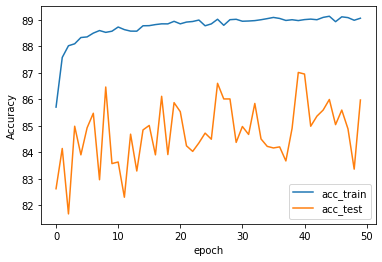

In [7]:
lr = 0.01 # learning rate
training_flag=1
num_epoch=50
acc_train_list,acc_test_list = model_train_test(num_epoch,x_train,y_train,x_test,y_test,weights,lr)
#Plot Accuracy against Epoch
data = pd.DataFrame({"epoch":[x for x in range(num_epoch)],"acc_train":np.array(acc_train_list),"acc_test": np.array(acc_test_list)})
sns.lineplot(data=data, x="epoch",y="acc_train", label="acc_train")
sns.lineplot(data=data, x="epoch",y="acc_test",label="acc_test")
plt.ylabel("Accuracy")
plt.plot()


Epoch: 1/50, Training Accuracy: 86.00, Testing Accuracy: 85.41
Epoch: 2/50, Training Accuracy: 87.69, Testing Accuracy: 84.95
Epoch: 3/50, Training Accuracy: 88.05, Testing Accuracy: 84.15
Epoch: 4/50, Training Accuracy: 88.20, Testing Accuracy: 85.35
Epoch: 5/50, Training Accuracy: 88.34, Testing Accuracy: 84.55
Epoch: 6/50, Training Accuracy: 88.49, Testing Accuracy: 81.85
Epoch: 7/50, Training Accuracy: 88.31, Testing Accuracy: 82.74
Epoch: 8/50, Training Accuracy: 88.52, Testing Accuracy: 83.83
Epoch: 9/50, Training Accuracy: 88.67, Testing Accuracy: 83.96
Epoch: 10/50, Training Accuracy: 88.73, Testing Accuracy: 87.12
Epoch: 11/50, Training Accuracy: 88.68, Testing Accuracy: 84.62
Epoch: 12/50, Training Accuracy: 88.67, Testing Accuracy: 84.04
Epoch: 13/50, Training Accuracy: 88.91, Testing Accuracy: 85.15
Epoch: 14/50, Training Accuracy: 88.64, Testing Accuracy: 86.55
Epoch: 15/50, Training Accuracy: 88.77, Testing Accuracy: 83.94
Epoch: 16/50, Training Accuracy: 88.78, Testing A

[]

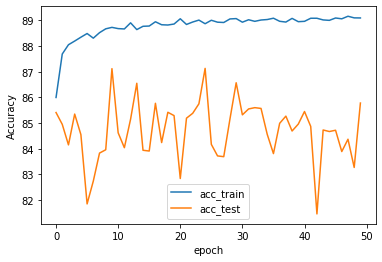

In [8]:
lr = 0.1 # learning rate
training_flag=1
num_epoch=50
acc_train_list,acc_test_list = model_train_test(num_epoch,x_train,y_train,x_test,y_test,weights,lr)
#Plot Accuracy against Epoch
data = pd.DataFrame({"epoch":[x for x in range(num_epoch)],"acc_train":np.array(acc_train_list),"acc_test": np.array(acc_test_list)})
sns.lineplot(data=data, x="epoch",y="acc_train", label="acc_train")
sns.lineplot(data=data, x="epoch",y="acc_test",label="acc_test")
plt.ylabel("Accuracy")
plt.plot()


Epoch: 1/50, Training Accuracy: 86.13, Testing Accuracy: 83.70
Epoch: 2/50, Training Accuracy: 87.93, Testing Accuracy: 83.88
Epoch: 3/50, Training Accuracy: 88.04, Testing Accuracy: 85.83
Epoch: 4/50, Training Accuracy: 88.20, Testing Accuracy: 83.33
Epoch: 5/50, Training Accuracy: 88.41, Testing Accuracy: 85.42
Epoch: 6/50, Training Accuracy: 88.53, Testing Accuracy: 84.15
Epoch: 7/50, Training Accuracy: 88.46, Testing Accuracy: 83.15
Epoch: 8/50, Training Accuracy: 88.54, Testing Accuracy: 84.38
Epoch: 9/50, Training Accuracy: 88.65, Testing Accuracy: 84.07
Epoch: 10/50, Training Accuracy: 88.66, Testing Accuracy: 85.33
Epoch: 11/50, Training Accuracy: 88.70, Testing Accuracy: 84.37
Epoch: 12/50, Training Accuracy: 88.72, Testing Accuracy: 85.30
Epoch: 13/50, Training Accuracy: 88.83, Testing Accuracy: 86.01
Epoch: 14/50, Training Accuracy: 88.83, Testing Accuracy: 85.36
Epoch: 15/50, Training Accuracy: 88.73, Testing Accuracy: 84.09
Epoch: 16/50, Training Accuracy: 88.91, Testing A

[]

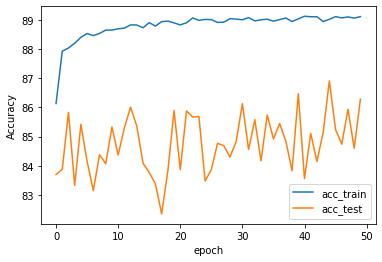

In [9]:
lr = 1.0 # learning rate
training_flag=1
num_epoch=50
acc_train_list,acc_test_list = model_train_test(num_epoch,x_train,y_train,x_test,y_test,weights,lr)
#Plot Accuracy against Epoch
data = pd.DataFrame({"epoch":[x for x in range(num_epoch)],"acc_train":np.array(acc_train_list),"acc_test": np.array(acc_test_list)})
sns.lineplot(data=data, x="epoch",y="acc_train", label="acc_train")
sns.lineplot(data=data, x="epoch",y="acc_test",label="acc_test")
plt.ylabel("Accuracy")
plt.plot()
